In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')


from data_downloader import DataDownloader, ClimateDataCleaner, EconomicDataCleaner
from var_model import ClimateVAR
from sdice_model import SimplifiedDICE

In [2]:
# Instancia para limpiar y procesar los datos climáticos
climate_cleaner = ClimateDataCleaner('Data/Temperature.csv', 'Data/Drought_Severity.csv', 'Data/CO2_Emissions.xlsx')
climate_data = climate_cleaner.clean_and_prepare_data()

# Instancia para limpiar y procesar los datos climáticos
economic_cleaner = EconomicDataCleaner('Data/GDP.csv', 'Data/TB3MS.csv', 'Data/CPI.csv')
economic_data = economic_cleaner.clean_and_prepare_data()

# Descarga los datos financieros
downloader = DataDownloader()
assets = ['AAPL', 'IBM', 'TSLA', 'GOOG', 'NVDA', 'NEE', 'FSLR', 'VWDRY', 'BEP'] 
benchmark = '^GSPC'  
start_date = '2014-11-01'
end_date = '2024-05-31'
rf = .065

asset_prices, benchmark_prices = downloader.download_data(start_date=start_date, 
                                                          end_date=end_date, 
                                                          assets=assets, 
                                                          benchmark=benchmark)

combined_data = pd.merge(asset_prices, climate_data, on='Date').iloc[:-1]
all_data = pd.merge(combined_data, economic_data, on='Date')


[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
all_data.drop('Date', axis=1, inplace=True)

In [4]:
# Supongamos que ya tienes los datos cargados en all_data (tu matriz de variables endógenas)
var_model = ClimateVAR(all_data)

# Ajustar el modelo VAR con un máximo de 1 retardo
var_results = var_model.fit(maxlags=1)

# Visualizar el resumen de los parámetros ajustados
print("Parámetros ajustados del modelo VAR:")
print(var_results)

# Realizar predicción futura con el modelo VAR
# 'end' se puede ajustar según la longitud de tus datos. Aquí se supone que quieres predecir hasta el final de tus datos.
predict = var_model.predict(var_results, lags=5, end=100)  # Ajusta 'end' al número de observaciones deseado
print("Valores predichos:")
predict



Valores predichos:


array([[ 4.87721849e-02, -2.19733627e-01,  1.37567426e+00, ...,
         2.19514602e+04,  3.96177256e+00,  2.39511538e+02],
       [ 6.69318219e-02, -1.61533322e-01,  1.39402011e+00, ...,
         2.17054630e+04,  3.69618696e+00,  2.38882416e+02],
       [ 5.93901145e-02, -1.77956778e-01,  1.33181329e+00, ...,
         2.16906633e+04,  3.78560798e+00,  2.39065054e+02],
       ...,
       [ 6.60294534e-02, -2.63862476e-01,  1.47796939e+00, ...,
         3.06811418e+04,  8.73867426e+00,  3.03078115e+02],
       [ 6.90956044e-02, -1.55776504e-01,  1.24864934e+00, ...,
         2.98229121e+04,  7.82588823e+00,  3.03116431e+02],
       [ 6.33856588e-02, -2.82172534e-01,  1.29357423e+00, ...,
         3.02552802e+04,  8.48105304e+00,  3.04206052e+02]])

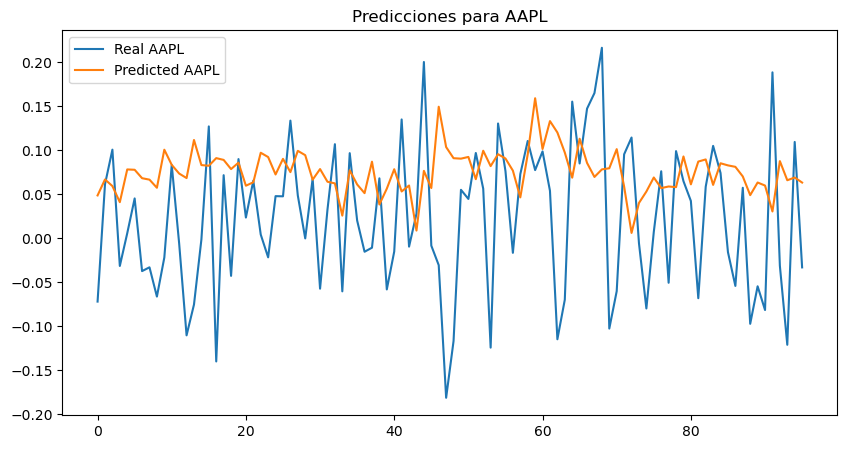

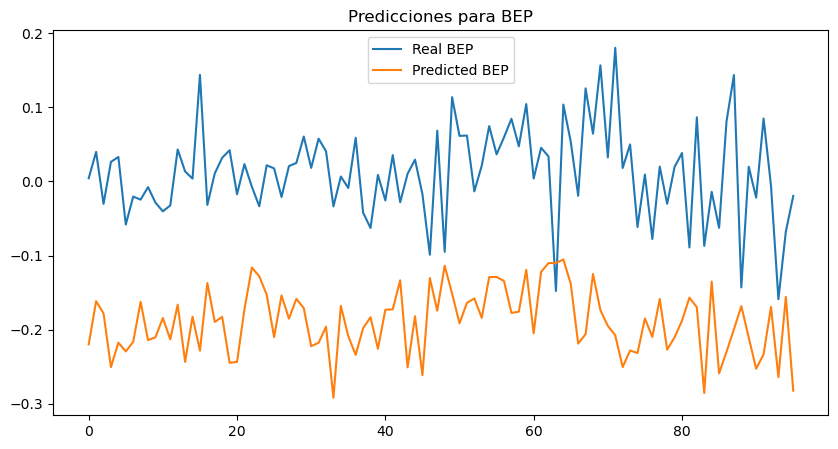

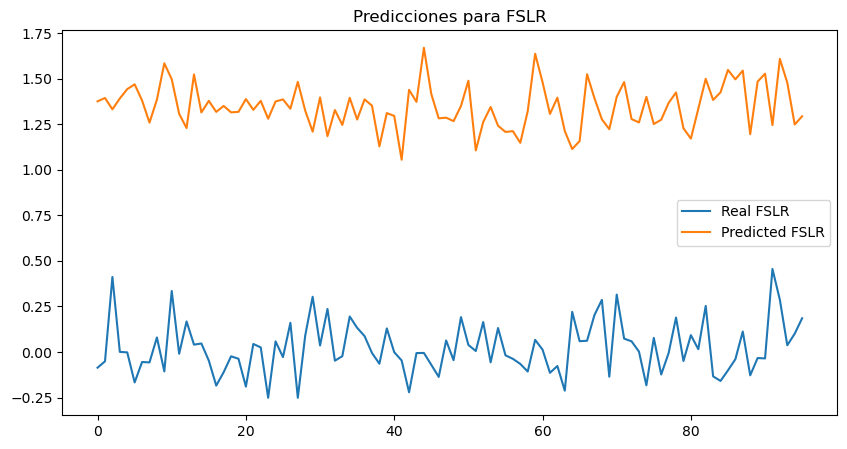

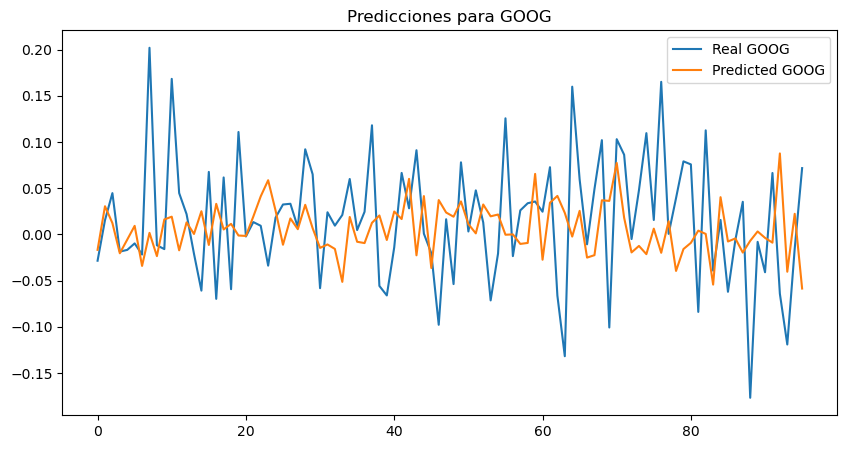

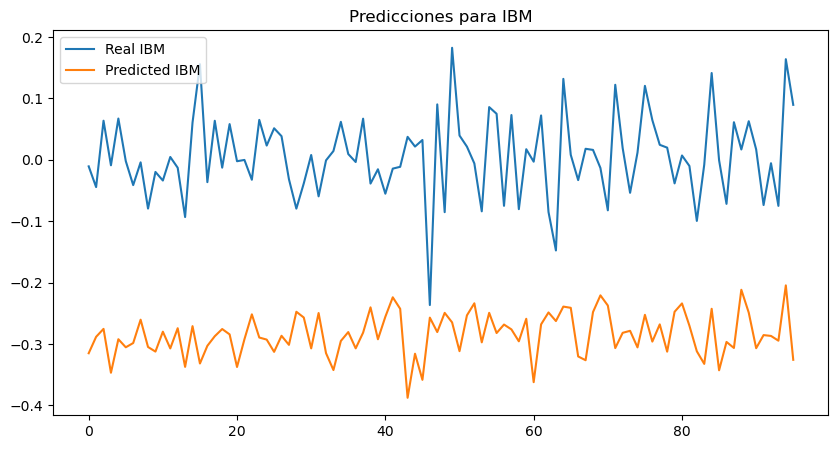

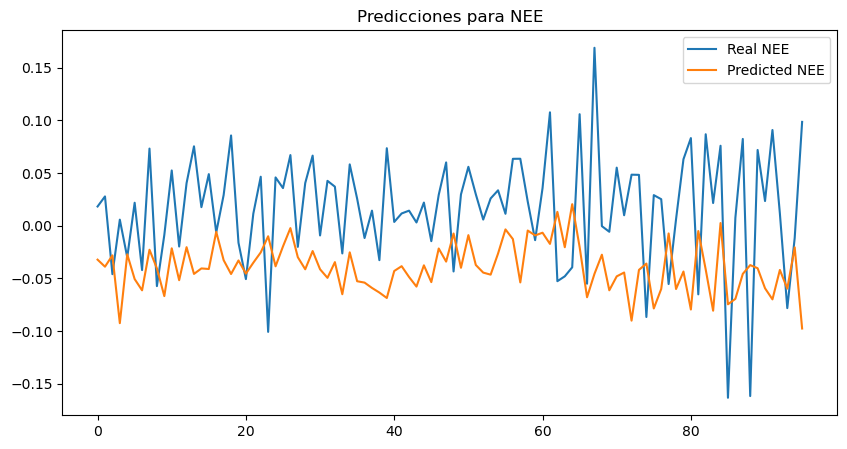

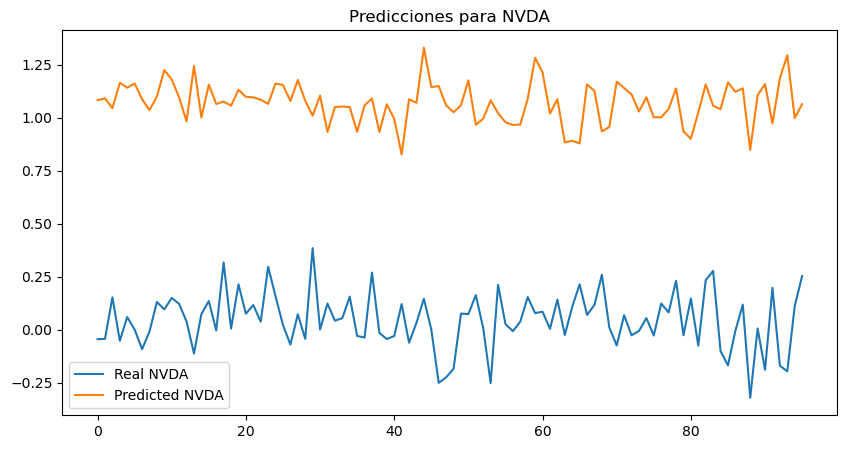

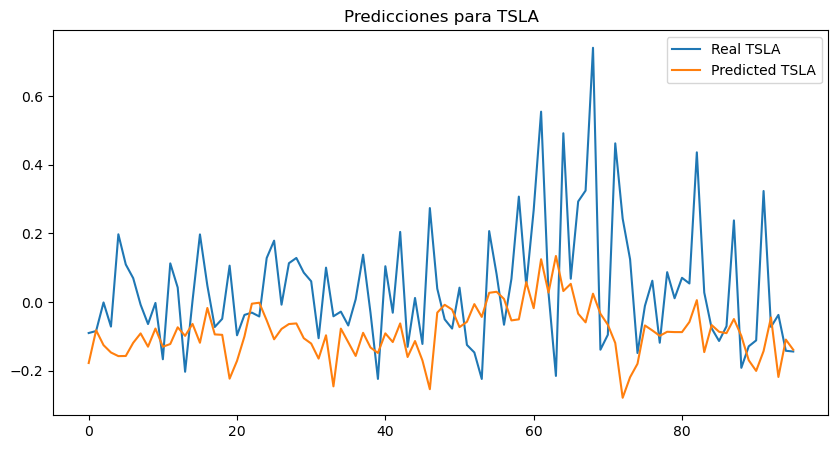

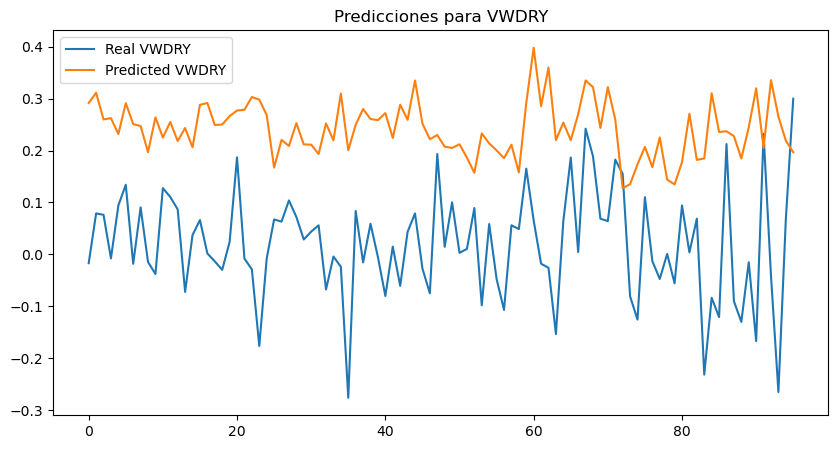

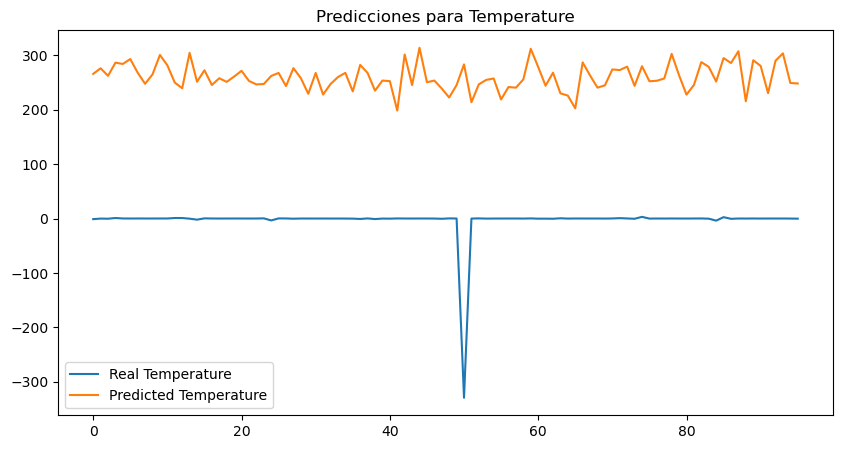

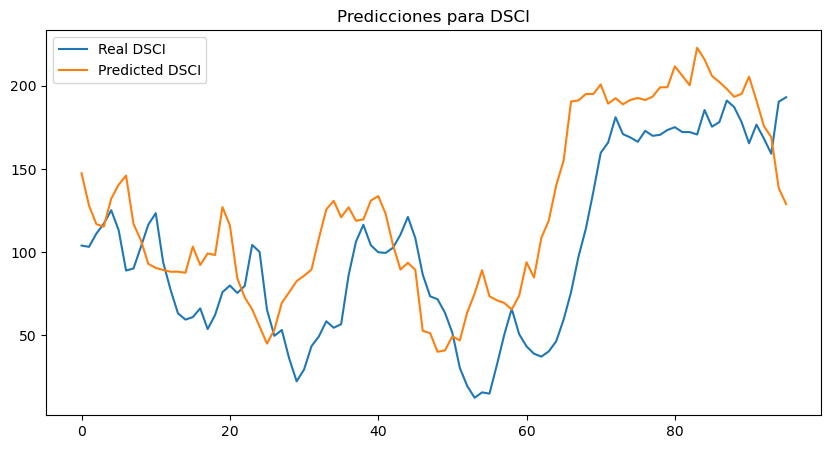

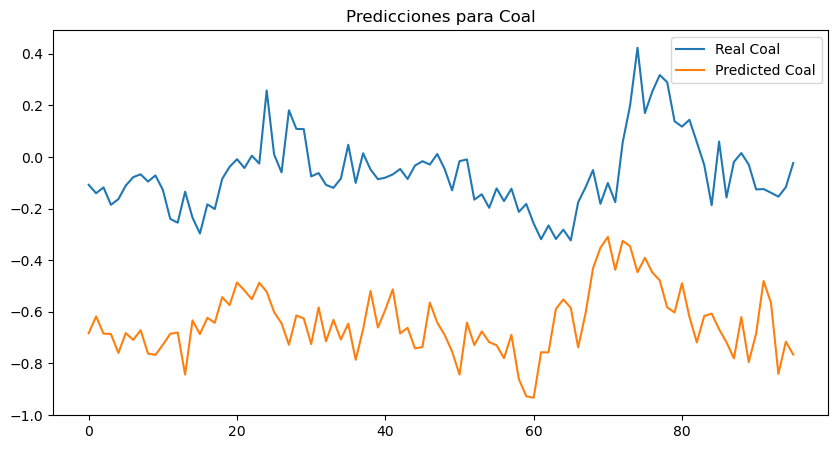

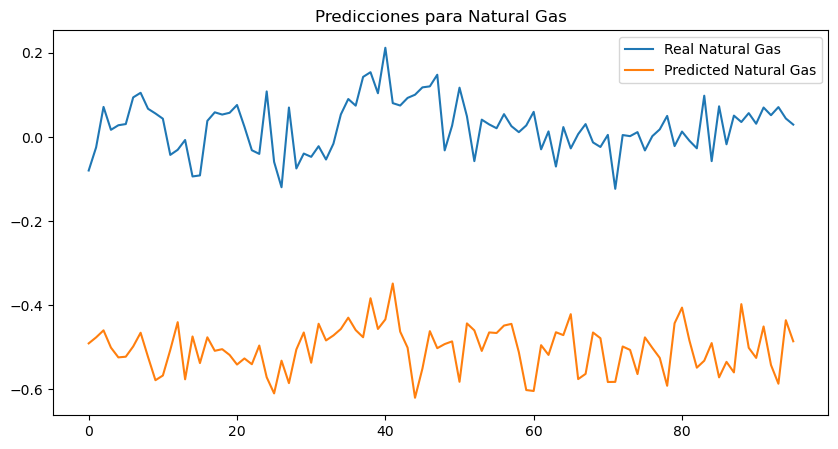

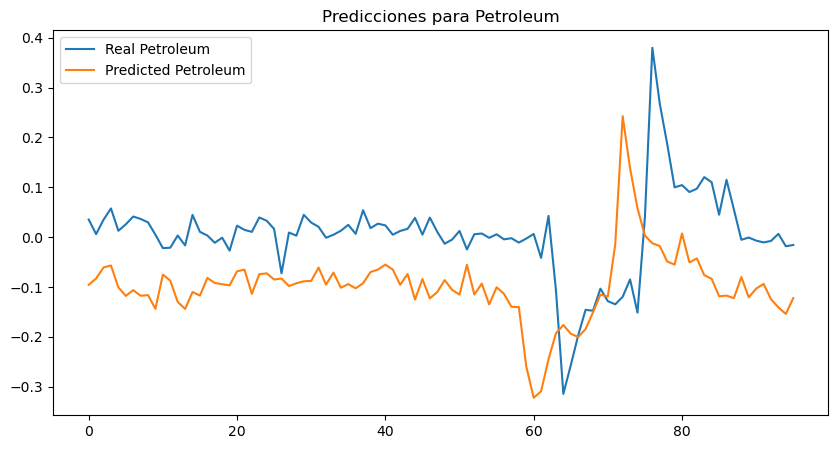

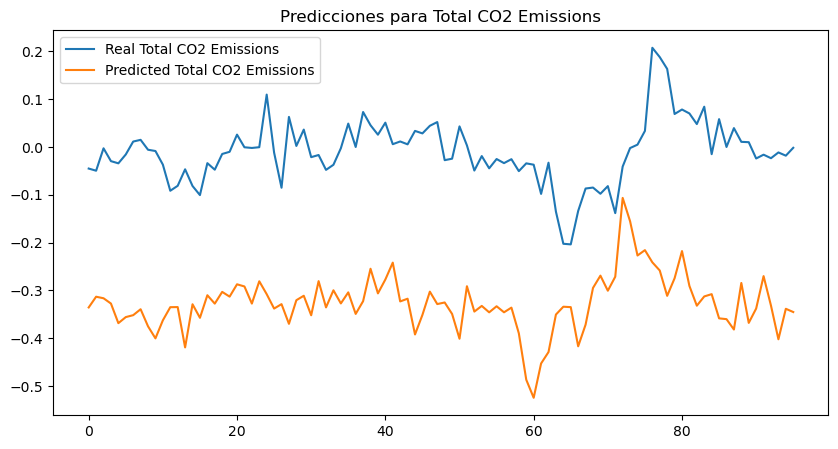

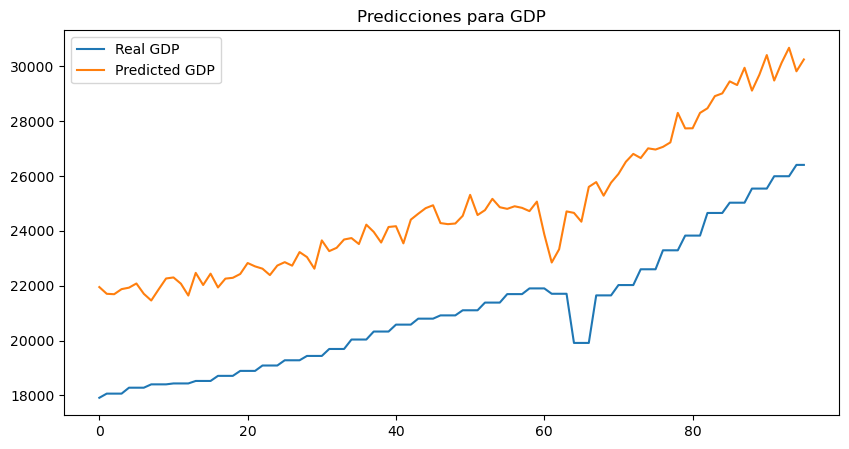

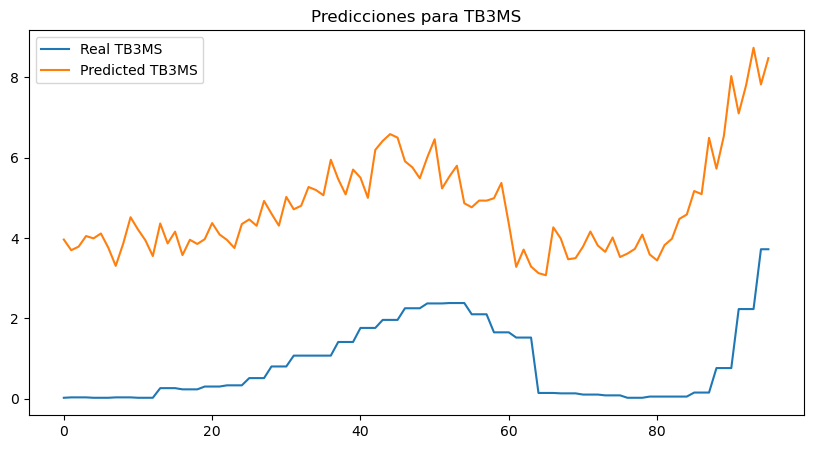

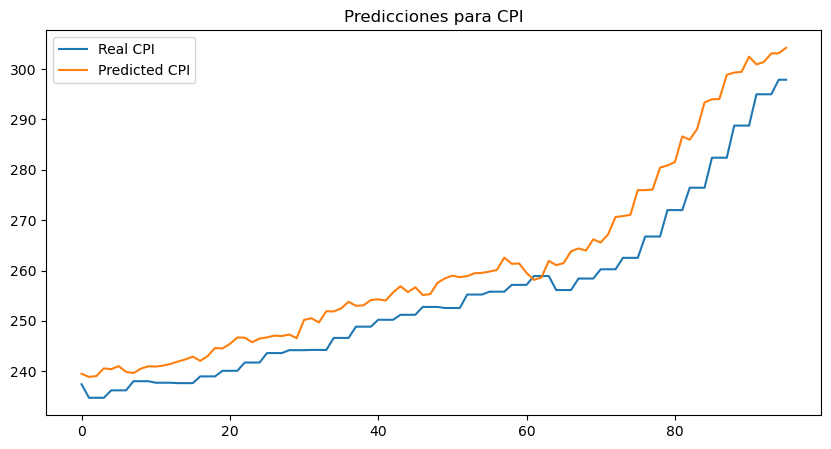

In [5]:
import matplotlib.pyplot as plt

# Graficar las predicciones versus los datos originales
for i, column in enumerate(all_data.columns):
    plt.figure(figsize=(10, 5))
    plt.plot(all_data.index[:len(predict)], all_data.iloc[:len(predict), i], label=f"Real {column}")
    plt.plot(all_data.index[:len(predict)], predict[:, i], label=f"Predicted {column}")
    plt.title(f"Predicciones para {column}")
    plt.legend()
    plt.show()


<Axes: title={'center': 'Asset Returns'}, xlabel='Date'>

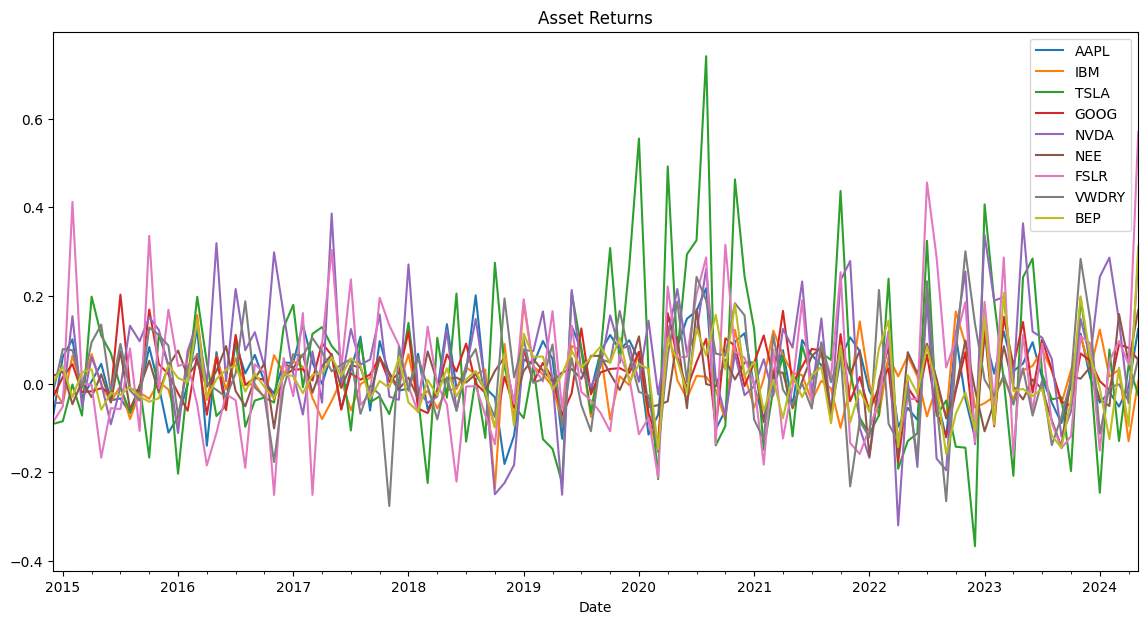

In [5]:
asset_prices.plot(x='Date', y=assets, figsize=(14, 7), title='Asset Returns')